In [1]:
import os
import numpy as np

import yaml
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import seaborn as sns

from OrderParameter import *

# Download link
def download_link(doi, file):
    if "zenodo" in doi.lower():
        zenodo_entry_number = doi.split(".")[2]
        return 'https://zenodo.org/record/' + zenodo_entry_number + '/files/' + file
    else:
        print ("DOI provided: {0}".format(doi))
        print ("Repository not validated. Please upload the data for example to zenodo.org")
        return ""
    
# read mapping file
def read_mapping_file(mapping_file, atom1):
    with open(mapping_file, 'rt') as mapping_file:
            for line in mapping_file:
                if atom1 in line:
                    m_atom1 = line.split()[1]
    return m_atom1

def read_mapping_filePAIR(mapping_file, atom1, atom2):
    with open(mapping_file, 'rt') as mapping_file:
            print(mapping_file)
            for line in mapping_file:
                if atom1 in line:
                    m_atom1 = line.split()[1]
#                    print(m_atom1)
                if atom2 in line: 
                    m_atom2 = line.split()[1]
#                    print(m_atom2)
    return m_atom1, m_atom2

def make_positive_angles(x):
    for i in range(len(x)):
        if x[i] < 0:
            x[i] = np.degrees(x[i]) + 360
        else:
            x[i] = np.degrees(x[i])
    return x

In [2]:
## Order parameter changes upon addition of CaCl_2 in all POPC:POPG mixtures 

In [3]:
colors = {'POPC' :'black','POPS':'red','POPE':'blue','POPG':'green'}
markers = {'POPC' :'s','POPS':'o','POPE':'o','POPG':'s'}
lipids = ['POPC','POPG']
#DOIs = {'POPC' :'10.5281/zenodo.3474862','POPG' :'10.5281/zenodo.1011096','POPS' :'10.5281/zenodo.1129415','POPE' :'10.5281/zenodo.2641987'}

results = {}
resultsPOPG = {}

fig= plt.figure(figsize=(10,7))
for subdir, dirs, files in os.walk(r'../Data/Simulations/'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith("README.yaml"):
            READMEfilepath = subdir + '/README.yaml'
            with open(READMEfilepath) as yaml_file:
                readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
                Nlipids = [readme.get('N' + lipids[0])[0],readme.get('N' + lipids[1])[0]]
                #print(Nlipids)
                if Nlipids[0] > 0 and Nlipids[1] > 0:
                    #print(subdir)
                    try:
                        CaConcentration = readme.get('NCAL') * 55.5 / readme.get('NSOL')
                    except:
                        print('Somenthing wrong with molecule numbers in' + subdir)
                    lipidsRATIO = 100* Nlipids[1] / (Nlipids[0] + Nlipids[1])
                    forcefield = readme.get('FF')
                    OPfilepath = subdir + '/POPCOrderParameters.json'
                    OPfilepathPOPG = subdir + '/POPGOrderParameters.json'
                    try :
                        with open(OPfilepath) as json_file:
                            data = json.load(json_file)
                            results[lipidsRATIO,CaConcentration,forcefield] = data
                    except :
                        print('Order parameter file not found')
                    try :
                        with open(OPfilepathPOPG) as json_file:
                            data = json.load(json_file)
                            resultsPOPG[lipidsRATIO,CaConcentration,forcefield] = data
                    except :
                        print('Order parameter file not found')
                    #print(data)
                    #BetaANDalphaOPs = [data['M_G3C5_M M_G3C5H1_M'],data['M_G3C5_M M_G3C5H2_M'],data['M_G3C4_M M_G3C4H1_M'],data['M_G3C4_M M_G3C4H2_M']]
                    
                    #print(readme.get('NPOPC')[0], readme.get('NPOPG')[0], readme.get('NCAL'))
                    #print(readme)

for key in results:
    outfile=open('../Data/' + str(key[2]) + str(int(round(key[0]))) + str(lipids[1]) + 'withCaCl.dat','w')
    outfile.write('#[CaCl]           M_G1C4_M M_G1C4H1_M                M_G1C4_M M_G1C4H2_M \n')
    outfile.close()
                    
for key in results:
    outfile=open('../Data/' + str(key[2]) + str(int(round(key[0]))) + str(lipids[1]) + 'withCaCl.dat','a')
    #Lipid2cont = int(round(key[0]))
    #CaConsentration = key[1]
    outfile.write(str(round(key[1],3)) + " " + str(results[key]['M_G3C4_M M_G3C4H1_M'][0][0]) +  " " + str(results[key]['M_G3C4_M M_G3C4H1_M'][0][2]) + "  ")                
    outfile.write(" " + str(results[key]['M_G3C4_M M_G3C4H2_M'][0][0]) +  " " + str(results[key]['M_G3C4_M M_G3C4H2_M'][0][2]) + "  ")
    outfile.write(" " + str(results[key]['M_G3C5_M M_G3C5H1_M'][0][0]) +  " " + str(results[key]['M_G3C5_M M_G3C5H1_M'][0][2]) + "  ")
    outfile.write(" " + str(results[key]['M_G3C5_M M_G3C5H2_M'][0][0]) +  " " + str(results[key]['M_G3C5_M M_G3C5H2_M'][0][2]) + "  ")
    outfile.write(" " + str(resultsPOPG[key]['M_G3C4_M M_G3C4H1_M'][0][0]) +  " " + str(resultsPOPG[key]['M_G3C4_M M_G3C4H1_M'][0][2]) + "  ")                
    outfile.write(" " + str(resultsPOPG[key]['M_G3C4_M M_G3C4H2_M'][0][0]) +  " " + str(resultsPOPG[key]['M_G3C4_M M_G3C4H2_M'][0][2]) + "  ")
    outfile.write(" " + str(resultsPOPG[key]['M_G3C5_M M_G3C5H1_M'][0][0]) +  " " + str(resultsPOPG[key]['M_G3C5_M M_G3C5H1_M'][0][2]) + "  ")
    #outfile.write(" " + str(resultsPOPG[key]['M_G3C5_M M_G3C5H2_M'][0][0]) +  " " + str(resultsPOPG[key]['M_G3C5_M M_G3C5H2_M'][0][2]) + "  ")
    outfile.write('\n')
    outfile.close()
    !sort {'../Data/' + str(key[2]) + str(int(round(key[0]))) + str(lipids[1]) + 'withCaCl.dat'} -o {'../Data/' + str(key[2]) + str(int(round(key[0]))) + str(lipids[1]) + 'withCaCl.dat'}
#plt.legend(loc='best',ncol=2, fontsize=15)
#plt.ylabel('S_CH', fontsize=20)
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
##plt.savefig('../Figs/CHARMMfromLIPIDS.eps', bbox_inches='tight')

Somenthing wrong with molecule numbers in../Data/Simulations/902/649/90264920ee5640b7c18082ff86a7fcc0b9bd75ea/b6e03a197721f25e989d3452166ec5f88ca0aae4
Order parameter file not found
Order parameter file not found
Somenthing wrong with molecule numbers in../Data/Simulations/4fb/255/4fb255b704c3d6a78c006a1b068e14c659d9667b/8e7e5deb23cdd19f7239116293ccf2a7995ecbbb
Somenthing wrong with molecule numbers in../Data/Simulations/e24/62a/e2462abc0128804263156d1f68638eb22de0ada6/fd4e6f8ed63c831f7b8bef6c2e22a887e49f73f9
Somenthing wrong with molecule numbers in../Data/Simulations/72c/a50/72ca507d6c27e37f020ca31197879b41f45a150a/66d5aff21e8512a9bec660eda244715dfd9eebe7
Somenthing wrong with molecule numbers in../Data/Simulations/c74/6ca/c746ca52b71d685e53a802e8046e1253baf6af2b/8850a90345eb033df4ae3228c3b9fa1fbbe40162
Order parameter file not found
Order parameter file not found
Somenthing wrong with molecule numbers in../Data/Simulations/944/25d/94425d6fcd0a0716ffd72d8908daff83a5ec6772/db9102a50e0

<Figure size 720x504 with 0 Axes>

## Plot order parameters for each simulation

FileNotFoundError: [Errno 2] No such file or directory: '../Data/Simulations/1af/8f6/1af8f6529627bed6a08027160f933a8ac5c5b86b/986ca46503349f7466c65e0dc3e2471376de1a28/OrderParameters.json'

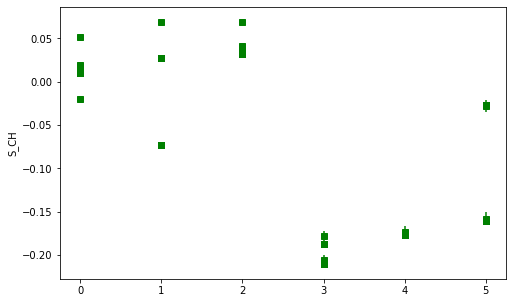

In [6]:
../Data/#mapping_file = './mapping_files/'+readme['MAPPING_DICT'][molname] # readme.get('MAPPING')[0][0]
colors = {'POPC' :'black','POPS':'red','POPE':'blue','POPG':'green'}
lipids = {'POPC','POPS','POPE','POPG'}


fig= plt.figure(figsize=(8,5))
for subdir, dirs, files in os.walk(r'../Data/Simulations/'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith("README.yaml"):
            READMEfilepath = subdir + '/README.yaml'
            with open(READMEfilepath) as yaml_file:
                readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
               # print(readme)
            for lipid in lipids:
                if lipid in readme.get('SYSTEM') and sum(readme['N' + lipid]) > 0:
                    OPfilepath = subdir + '/OrderParameters.json'
                    #print(OPfilepath)
                    #print(readme.get('SYSTEM'))
                    with open(OPfilepath) as json_file:
                        data = json.load(json_file)
                    for key,value in data.items():
                       #print (key,value[0][0],value[0][2])
                        plt.gca().invert_yaxis()
                        plt.ylabel('S_CH')
                        
                        if lipid == 'POPG' and 'M_G3C6_M' in key:
                            plt.plot(0,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(0,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'M_G3N6' in key:
                            plt.plot(0,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(0,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'M_G3C5_M' in key:
                            plt.plot(1,value[0][0],"s",color=colors[lipid],label=readme.get('SYSTEM'))
                            plt.errorbar(1,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'M_G3C4_M' in key:
                            plt.plot(2,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(2,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'M_G3_M' in key:
                            plt.plot(3,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(3,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'M_G2_M' in key:
                            plt.plot(4,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(4,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'M_G1_M' in key:
                            plt.plot(5,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(5,value[0][0],yerr=value[0][2],color=colors[lipid])
            
plt.legend(loc='best',ncol=2)
#plt.savefig('/media/akiirikk/DATADRIVE1/tietokanta/NMRlipidsIVPEandPG/Figs/CHARMMfromLIPIDS.eps')
                    